In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Colab Notebooks/Artificial NN & Deep Learning/Assignment 1

Mounted at /gdrive
/gdrive/MyDrive/Colab Notebooks/Artificial NN & Deep Learning/Assignment 1


In [3]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print("Tensorflow version : " + tf.__version__)

# Import other libraries
import requests
from io import BytesIO
import cv2
from PIL import Image
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

plt.rc('font', size=14)
%matplotlib inline

Tensorflow version : 2.17.0


## 📫 Load Dataset :

In [4]:
data = np.load('training_set.npz')
images = data["images"] / 255.0
target = data["labels"]
print('Images set shape', images.shape)
print('Target shape', target.shape)

Images set shape (13759, 96, 96, 3)
Target shape (13759, 1)


#### Unique target labels & their counts :

In [5]:
unique, count = np.unique(target, return_counts=True)
print('Target labels:', unique)
for u in unique:
    print(f'Class {unique[u]} has {count[u]} samples')

Target labels: [0 1 2 3 4 5 6 7]
Class 0 has 1052 samples
Class 1 has 2381 samples
Class 2 has 1285 samples
Class 3 has 2226 samples
Class 4 has 1049 samples
Class 5 has 1393 samples
Class 6 has 2530 samples
Class 7 has 1843 samples


#### Cut into train-validation set & test set :

In [6]:
# Split the dataset into a combined training and validation set, and a separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    images,
    target,
    test_size = 0.1,
    random_state = seed,
    stratify = target # maintain class distribution.
)

# Print the shapes of the resulting datasets
print("Training/Val Data Shape:", X_train_val.shape)
print("Training/Val Label Shape:", y_train_val.shape)
print("Test Data Shape:", X_test.shape)
print("Test Label Shape:", y_test.shape)

Training/Val Data Shape: (12383, 96, 96, 3)
Training/Val Label Shape: (12383, 1)
Test Data Shape: (1376, 96, 96, 3)
Test Label Shape: (1376, 1)


In [7]:
# Split training-validation data into training set and a separate validation set :
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    random_state = seed,
    test_size = 0.1,
    stratify = y_train_val # maintain class distribution.
    )

# Print the shapes of the resulting datasets
print("Training Data Shape:", X_train.shape)
print("Training Label Shape:", y_train.shape)
print("Validation Data Shape:", X_val.shape)
print("Validation Label Shape:", y_val.shape)

Training Data Shape: (11144, 96, 96, 3)
Training Label Shape: (11144, 1)
Validation Data Shape: (1239, 96, 96, 3)
Validation Label Shape: (1239, 1)


## 👓 Inspect data :

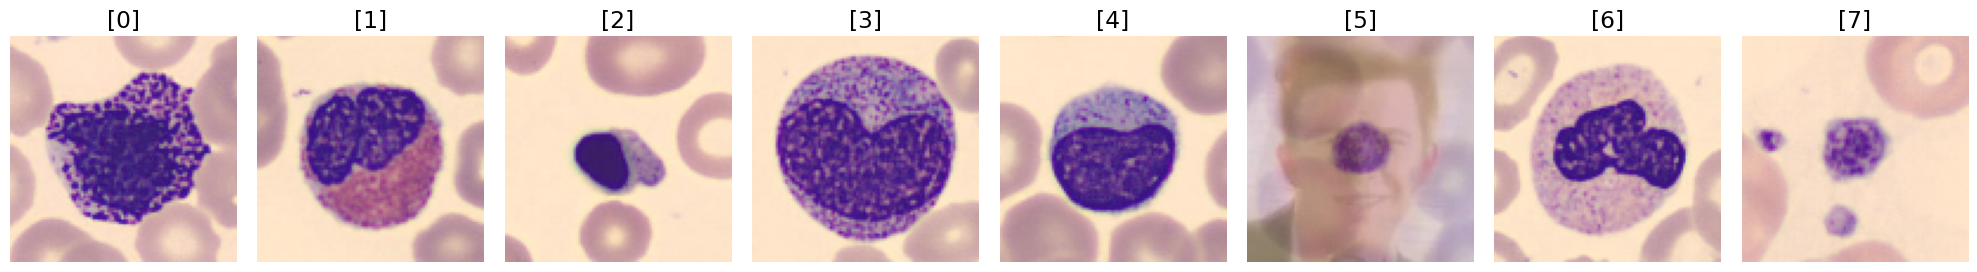

In [86]:
# Display one image per target class :
num_img = 8

# Get the unique labels from the target variable
unique_labels = np.unique(target)

# Initialize an empty list to store the selected indices
selected_indices = []

# Loop through each unique label and select one image for that label
for i, label in enumerate(unique_labels):
    # Find the indices of the images that belong to the current label
    label_indices = [idx for idx in range(len(target)) if target[idx][0] == label]

    # Randomly select one image from the current label's indices
    selected_idx = random.choice(label_indices)
    selected_indices.append(selected_idx)  # Append the selected index

# Create a subplot grid to display the images
fig, axes = plt.subplots(1, num_img, figsize=(20, 20))

# Iterate through the selected indices and display the images
for i, selected_idx in enumerate(selected_indices):
    ax = axes[i]  # Directly use the index in the axes grid
    ax.imshow(np.squeeze(images[selected_idx]), vmin=0., vmax=1.)
    ax.set_title(f'{target[selected_idx]}')  # Show the label's name
    ax.axis('off')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

In [85]:
def plot_100(target_class):
  # Set the target class for which you want to display images
  #target_class = 2
  num_img = 100  # Total images to display

  # Filter indices for target class 6
  target_indices = [idx for idx in range(len(target)) if target[idx][0] == target_class]

  # Randomly select `num_img` images from the filtered target class 6 indices
  selected_indices = random.sample(target_indices, num_img)

  # Create a subplot grid (10x10)
  fig, axes = plt.subplots(10, 10, figsize=(20, 20))

  # Iterate through the selected indices and display the images
  for i, selected_idx in enumerate(selected_indices):
      ax = axes[i // 10, i % 10]  # Arrange axes in a 10x10 grid
      ax.imshow(np.squeeze(images[selected_idx]), vmin=0., vmax=1.)
      ax.set_title(f'{target[selected_idx]}')  # Show the label's name (6)
      ax.axis('off')

  # Adjust layout to avoid overlapping
  plt.tight_layout()
  return plt.show()

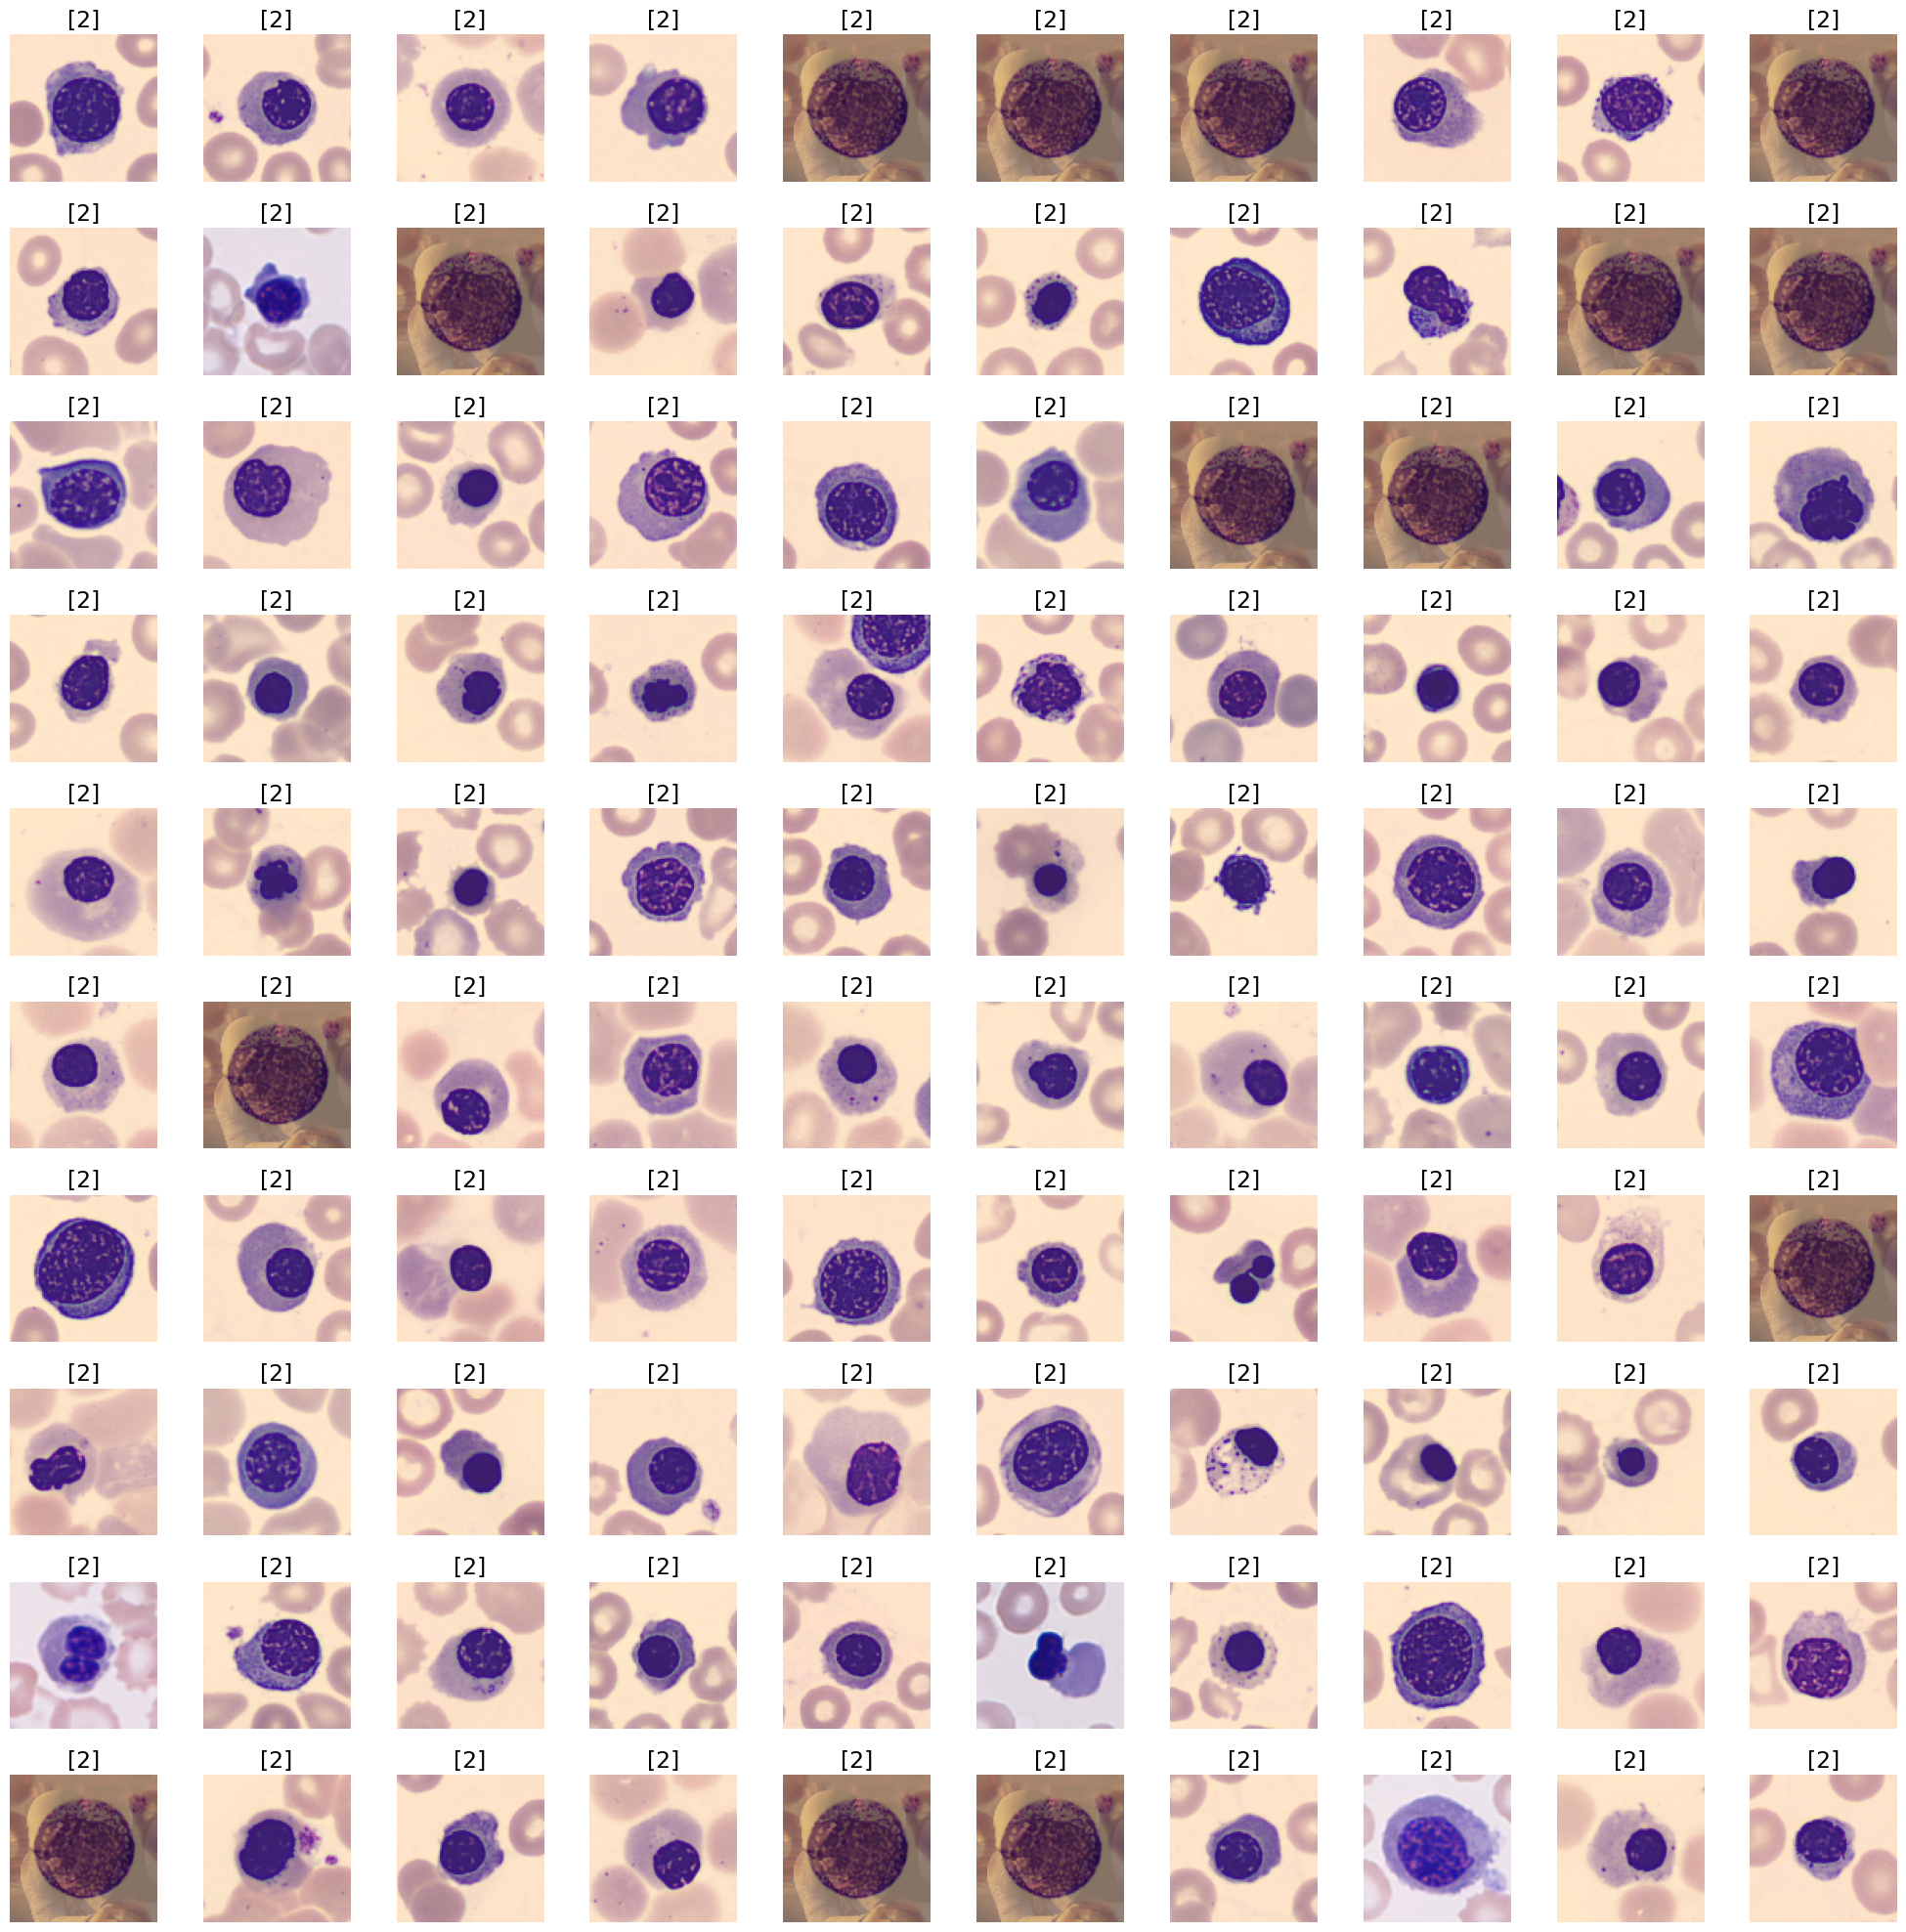

In [83]:
plot_100(2)

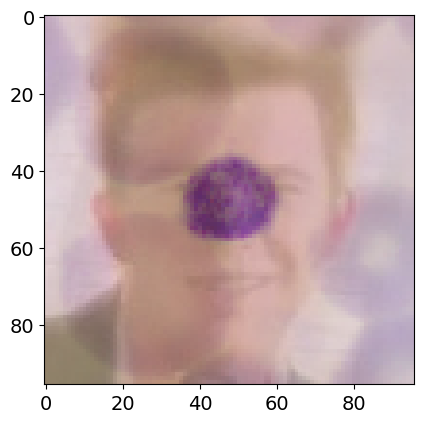

In [91]:
# Let's try to find all the "never gonna give you up" images :
plt.imshow(images[13700])

Found 200 images that are identical to the target image.
Matching indices: [13559, 13560, 13561, 13562, 13563, 13564, 13565, 13566, 13567, 13568, 13569, 13570, 13571, 13572, 13573, 13574, 13575, 13576, 13577, 13578, 13579, 13580, 13581, 13582, 13583, 13584, 13585, 13586, 13587, 13588, 13589, 13590, 13591, 13592, 13593, 13594, 13595, 13596, 13597, 13598, 13599, 13600, 13601, 13602, 13603, 13604, 13605, 13606, 13607, 13608, 13609, 13610, 13611, 13612, 13613, 13614, 13615, 13616, 13617, 13618, 13619, 13620, 13621, 13622, 13623, 13624, 13625, 13626, 13627, 13628, 13629, 13630, 13631, 13632, 13633, 13634, 13635, 13636, 13637, 13638, 13639, 13640, 13641, 13642, 13643, 13644, 13645, 13646, 13647, 13648, 13649, 13650, 13651, 13652, 13653, 13654, 13655, 13656, 13657, 13658, 13659, 13660, 13661, 13662, 13663, 13664, 13665, 13666, 13667, 13668, 13669, 13670, 13671, 13672, 13673, 13674, 13675, 13676, 13677, 13678, 13679, 13680, 13681, 13682, 13683, 13684, 13685, 13686, 13687, 13688, 13689, 13690, 

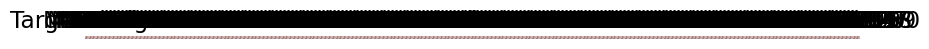

In [92]:
# Get the target image
target_image = images[13700]

# Initialize a list to store the indices of images that match the target image
matching_indices = []

# Iterate over the images in the dataset
for idx, img in enumerate(images):
    # Check if the current image is exactly equal to the target image (pixel-by-pixel)
    if np.array_equal(np.squeeze(img), np.squeeze(target_image)):
        matching_indices.append(idx)

# Display the matching indices
print(f"Found {len(matching_indices)} images that are identical to the target image.")
print(f"Matching indices: {matching_indices}")

# If you want to visualize them, you can plot the matching images:
import matplotlib.pyplot as plt

# Display the target image
plt.figure(figsize=(10, 10))
plt.subplot(1, len(matching_indices) + 1, 1)
plt.imshow(np.squeeze(target_image), vmin=0., vmax=1.)
plt.title('Target Image')
plt.axis('off')

# Display matching images
for i, idx in enumerate(matching_indices):
    plt.subplot(1, len(matching_indices) + 1, i + 2)
    plt.imshow(np.squeeze(images[idx]), vmin=0., vmax=1.)
    plt.title(f'Match {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [94]:
np.min(matching_indices), np.max(matching_indices)

(13559, 13758)

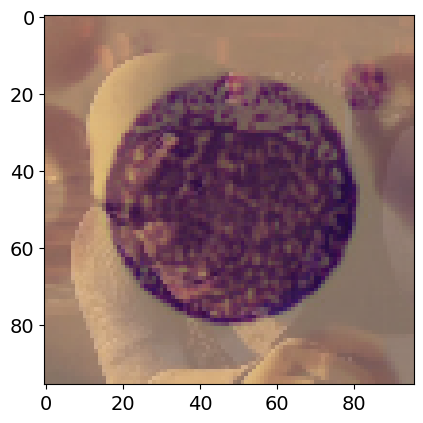

In [95]:
# Let's do the same with the other weird image :
plt.imshow(images[12435])

Found 1600 images that are identical to the target image.
Matching indices: [11959, 11960, 11961, 11962, 11963, 11964, 11965, 11966, 11967, 11968, 11969, 11970, 11971, 11972, 11973, 11974, 11975, 11976, 11977, 11978, 11979, 11980, 11981, 11982, 11983, 11984, 11985, 11986, 11987, 11988, 11989, 11990, 11991, 11992, 11993, 11994, 11995, 11996, 11997, 11998, 11999, 12000, 12001, 12002, 12003, 12004, 12005, 12006, 12007, 12008, 12009, 12010, 12011, 12012, 12013, 12014, 12015, 12016, 12017, 12018, 12019, 12020, 12021, 12022, 12023, 12024, 12025, 12026, 12027, 12028, 12029, 12030, 12031, 12032, 12033, 12034, 12035, 12036, 12037, 12038, 12039, 12040, 12041, 12042, 12043, 12044, 12045, 12046, 12047, 12048, 12049, 12050, 12051, 12052, 12053, 12054, 12055, 12056, 12057, 12058, 12059, 12060, 12061, 12062, 12063, 12064, 12065, 12066, 12067, 12068, 12069, 12070, 12071, 12072, 12073, 12074, 12075, 12076, 12077, 12078, 12079, 12080, 12081, 12082, 12083, 12084, 12085, 12086, 12087, 12088, 12089, 12090,

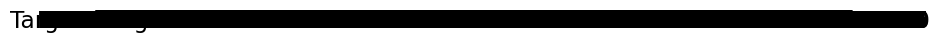

In [96]:
# Get the target image
target_image = images[12435]

# Initialize a list to store the indices of images that match the target image
matching_indices = []

# Iterate over the images in the dataset
for idx, img in enumerate(images):
    # Check if the current image is exactly equal to the target image (pixel-by-pixel)
    if np.array_equal(np.squeeze(img), np.squeeze(target_image)):
        matching_indices.append(idx)

# Display the matching indices
print(f"Found {len(matching_indices)} images that are identical to the target image.")
print(f"Matching indices: {matching_indices}")

# If you want to visualize them, you can plot the matching images:
import matplotlib.pyplot as plt

# Display the target image
plt.figure(figsize=(10, 10))
plt.subplot(1, len(matching_indices) + 1, 1)
plt.imshow(np.squeeze(target_image), vmin=0., vmax=1.)
plt.title('Target Image')
plt.axis('off')

# Display matching images
for i, idx in enumerate(matching_indices):
    plt.subplot(1, len(matching_indices) + 1, i + 2)
    plt.imshow(np.squeeze(images[idx]), vmin=0., vmax=1.)
    plt.title(f'Match {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [97]:
np.min(matching_indices), np.max(matching_indices)

(11959, 13558)

In [98]:
13558 - 11959

1599